### Data Exploration and Preparation

#### The Titanic Case - Prediction on Survival

- The sinking of the Titanic is one of the most infamous shipwrecks in history

- Reasons for passengers who survived
    - Women, Children
    - Upper-class / Social status
    - ...

- In this very first project, we are trying to analyze **what types of people were likely to survive**

- You can refer to the following link to know more about the project https://www.kaggle.com/c/titanic 

#### Data Exploration

- Before we start our analysis, it is always a good practice to look into our data first

In [1]:
# import library used for data management
import numpy as np 
import pandas as pd 

In [2]:
# load datasets
train = pd.read_csv('train.csv',index_col='PassengerId')
test = pd.read_csv('test.csv',index_col='PassengerId')

In [3]:
# view first 5 rows in train data frame
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# view first 5 rows in test data frame
test.head()
# test data does not contain "Survived" column

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# get data frame info
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non

- Train data: there are missing values for 'Age', 'Cabin' and 'Embarked'
- Test data: there are missing values for 'Age', 'Fare' and 'Cabin'

# Deal with missing values

In [6]:
# replace missing value for "Age" in both train and test data by using mean of 'Age' from train data
train['Age'].fillna(train['Age'].mean(),inplace = True)
test['Age'].fillna(train['Age'].mean(),inplace = True)

In [7]:
# replace missing value for "Embarked" in train data with mode
train['Embarked'].fillna(train['Embarked'].mode(),inplace = True)

In [8]:
# replace missing value for "Fare" in test data with mean of 'Fare' from train data
test['Fare'].fillna(train['Fare'].mean(),inplace = True)

In [9]:
# drop 'Cabin' for both train and test data
train = train.drop(columns='Cabin')

In [10]:
test = test.drop(columns='Cabin')

In [11]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-

# Data Visualization
- visual representation of data
- to communicate information clearly and efficiently
- effective visualization helps users analyze and reason about data and evidence

In [12]:
# import libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(18,6))

<Figure size 1296x432 with 0 Axes>

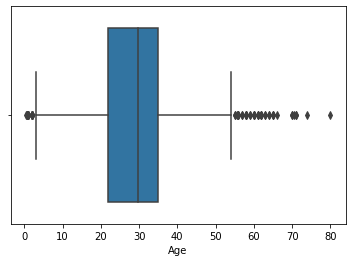

In [13]:
# boxplot for Age 
ax = sns.boxplot(train['Age'])


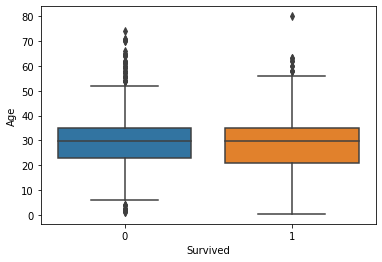

In [14]:
# boxplot for Age Regarding Survived
bx = sns.boxplot(x = train['Survived'], y = train['Age'])


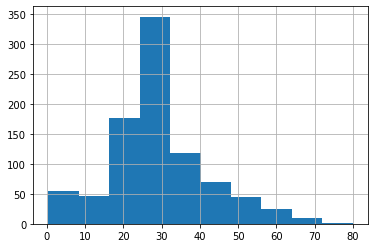

In [15]:
# histogram for Age
train['Age'].hist()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000229FDC84390>,
      dtype=object)

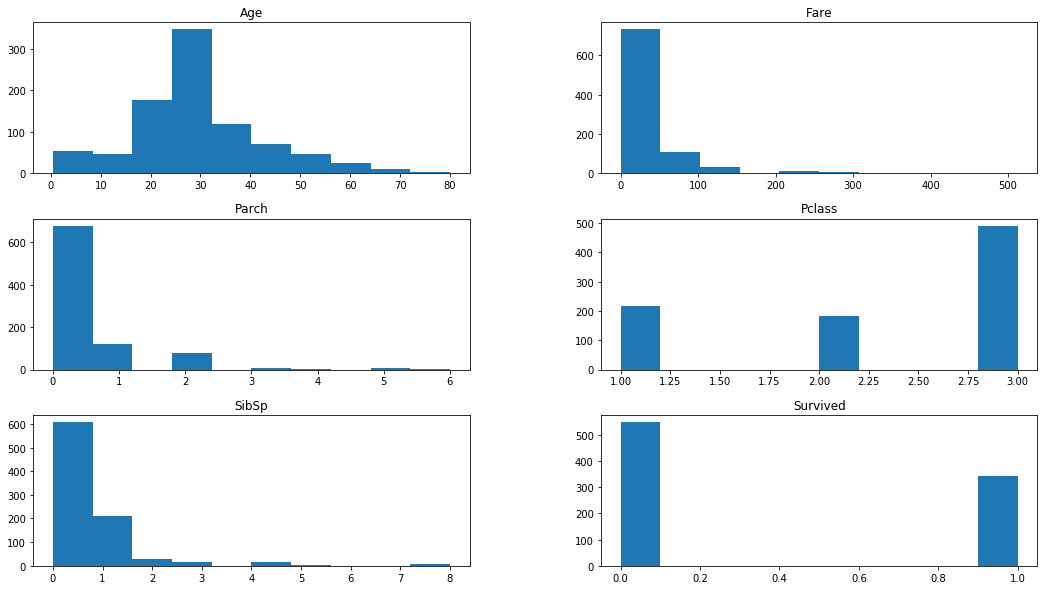

In [16]:
# histogram for all numeric variables
train.hist(bins=10,figsize=(18,10),grid=False)


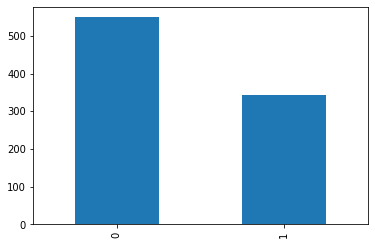

In [17]:
# Bar chart for Survived
train['Survived'].value_counts().plot(kind='bar')



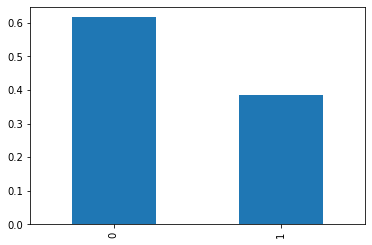

In [18]:
# Bar chart as %
train['Survived'].value_counts(normalize=True).plot(kind='bar')


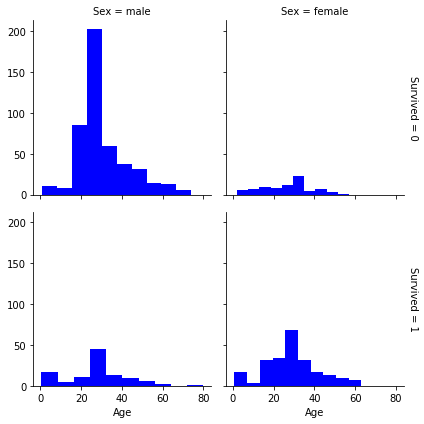

In [19]:
# histogram for categorical variables
g = sns.FacetGrid(train, col='Sex', row='Survived', margin_titles=True)
g.map(plt.hist,'Age',color='blue')



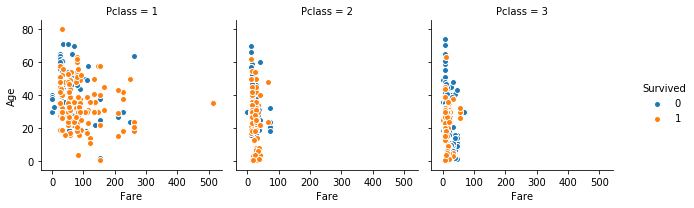

In [20]:
g = sns.FacetGrid(train, hue='Survived', col='Pclass', margin_titles=True)
g=g.map(plt.scatter, 'Fare', 'Age',edgecolor='w').add_legend()


# Feature Engineering

- The process of using domain knowledge of the data to create features that make machine learning algorithms work
- Considered essential in applied machine learning / data analytics
- Difficult and expensive

In [21]:
# Bining / Descritization

# give names for different age group
group_names = ['Young', 'Middle aged', 'Senior']



In [22]:
# divide Age into 3 equal interval groups and give corresponding names

train['Age-binned']=pd.cut(train['Age'], 3 , labels=group_names)


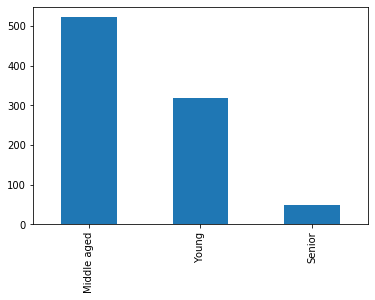

In [23]:
# View Age-binned in bar chart
train['Age-binned'].value_counts().plot(kind='bar')



In [24]:
# normalize Fare
# import library 

from sklearn import preprocessing


In [25]:
# Apply min-max normalization on a single attribute

minmax_scaler = preprocessing.MinMaxScaler().fit(train[['Fare']])
train['Fare_minmax']=minmax_scaler.transform(train[['Fare']])


In [26]:
# Apply z-score normalization on a single attribute

zscore_scaler = preprocessing.StandardScaler().fit(train[['Fare']])
train['Fare_zscore']=zscore_scaler.transform(train[['Fare']])

In [27]:
# get dummy variables for categorical varialbes 'Sex' and 'Embarked' in train 
train =pd.get_dummies(train, columns=['Sex', 'Embarked'],drop_first = True)

# this line of code not only help you to get dummies and autometically drop the first column, it also help you to delete the original column
# Please check out more via https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.get_dummies.html 

In [28]:
# get dummy variables for categorical varialbes 'Sex' and 'Embarked' in test 
test =pd.get_dummies(test, columns=['Sex', 'Embarked'],drop_first = True)

In [29]:
train.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Age-binned,Fare_minmax,Fare_zscore,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,Young,0.014151,-0.502445,1,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,Middle aged,0.139136,0.786845,0,0,0
3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,Young,0.015469,-0.488854,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,Middle aged,0.103644,0.420730,0,0,1
5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,Middle aged,0.015713,-0.486337,1,0,1


In [30]:
test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Name        418 non-null    object 
 2   Age         418 non-null    float64
 3   SibSp       418 non-null    int64  
 4   Parch       418 non-null    int64  
 5   Ticket      418 non-null    object 
 6   Fare        418 non-null    float64
 7   Sex_male    418 non-null    uint8  
 8   Embarked_Q  418 non-null    uint8  
 9   Embarked_S  418 non-null    uint8  
dtypes: float64(2), int64(3), object(2), uint8(3)
memory usage: 27.3+ KB


In [31]:
# drop columns that you don't need
train = train.drop(columns=['Name','Fare_minmax','Fare_zscore','Ticket'])

In [32]:
test = test.drop(columns=['Name','Ticket'])

In [33]:
# save the datasets and write to csv, so you don't need to do the data cleaning from the very beginning
train.to_csv('train_titanic.csv')

In [34]:
test.to_csv('test_titanic.csv')